In [1]:
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path

['',
 'C:\\Users\\gandh\\Downloads\\Datasets\\The Federalist',
 'C:\\Users\\gandh\\Anaconda3\\python36.zip',
 'C:\\Users\\gandh\\Anaconda3\\DLLs',
 'C:\\Users\\gandh\\Anaconda3\\lib',
 'C:\\Users\\gandh\\Anaconda3',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\gandh\\.ipython']

In [3]:
import federalist

In [4]:
df=federalist.load_federalist_dataset()

In [5]:
df.shape

(85, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
paper_id       85 non-null object
text           85 non-null object
date           85 non-null object
title          85 non-null object
author         85 non-null object
venue          84 non-null object
wordcount      85 non-null object
total_words    85 non-null float64
dtypes: float64(1), object(7)
memory usage: 5.4+ KB


In [7]:
df.drop(columns='wordcount',axis=1,inplace=True)

In [8]:
df['number_of_sentences']=0

for i in range(0,len(df)):
    #Number of sentences
    df['number_of_sentences'].iloc[i]=len(df['text'].iloc[i].split('.'))
    #Number of words
    #temp=df['text'].iloc[0].replace('.',' ').replace("  "," ").replace("   "," ")
    #len(temp.split(" "))

In [9]:
corpuslist=[]

In [10]:
for i in range(0,len(df)):
    t=list(set(df['text'].iloc[i].replace("."," ").replace('"',' ').replace("  "," ").split(" ")))
    for word in t:
        if word in corpuslist:
            pass
        elif len(word)<2:
            pass            
        else:
            corpuslist.append(word)
            continue
    

In [11]:
for row in range(0,len(df)):
    for word in corpuslist:
        temp=word+'_count'
        if temp in df.columns:
            pass
        else:
            df[temp]=0
        df[temp].iloc[row]=df['text'].iloc[row].count(word)

In [12]:
df.shape

(85, 8823)

In [13]:
df=df[df['author']!='JAY']

In [14]:
df.shape

(80, 8823)

In [15]:
df2=df[(df.author=='HAMILTON') | (df.author=='MADISON')]

In [16]:
df_test=df[df.author=='HAMILTON OR MADISON']

In [17]:
df2.groupby('author').sum()['total_words']/df2.groupby('author').sum()['number_of_sentences']

author
HAMILTON    34.491463
MADISON     35.250000
dtype: float64

In [18]:
df2.head(1)

,paper_id,text,date,title,author,venue,total_words,number_of_sentences,we_count,jealousies_count,...,recommence_count,utter_count,hume_count,intemperances_count,trembling_count,demagogue_count,intents_count,essays_count,constrained_count,irrevocably_count
0,1,to the people of the state of new york after a...,null,General Introduction,HAMILTON,For the Independent Journal,1618.0,51,24,1,...,0,0,0,0,0,1,0,0,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
df2['author']=le.fit_transform(df2['author'])

In [22]:
df2.head(1)

,paper_id,text,date,title,author,venue,total_words,number_of_sentences,we_count,jealousies_count,...,recommence_count,utter_count,hume_count,intemperances_count,trembling_count,demagogue_count,intents_count,essays_count,constrained_count,irrevocably_count
0,1,to the people of the state of new york after a...,null,General Introduction,0,For the Independent Journal,1618.0,51,24,1,...,0,0,0,0,0,1,0,0,0,0


In [23]:
X=df2.iloc[:,6:]
y=df2.iloc[:,4]

In [24]:
from sklearn.model_selection import train_test_split
X1,X_test,y1,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
sm=SMOTE(random_state=12)

In [27]:
print("Shape of X1 : ",X1.shape)
print("Shape of y1 : ",y1.shape)

Shape of X1 :  (52, 8817)
Shape of y1 :  (52,)


In [28]:
X1,y1=sm.fit_sample(X1,y1)

In [29]:
print("Shape of X1 : ",X1.shape)
print("Shape of y1 : ",y1.shape)

Shape of X1 :  (78, 8817)
Shape of y1 :  (78,)


In [30]:
X_train,X_val,y_train,y_val=train_test_split(X1,y1,test_size=0.2)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
predictions=rf.predict(X_val)

In [34]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,precision_score,recall_score,accuracy_score

In [35]:
print("Confusion Matrix : "+"\n",confusion_matrix(y_val,predictions))
print("Accuracy Score : ",accuracy_score(y_val,predictions)*100)
print("Precision Score : ",precision_score(y_val,predictions)*100)
print("Recall Score : ",recall_score(y_val,predictions)*100)

Confusion Matrix : 
 [[7 1]
 [3 5]]
Accuracy Score :  75.0
Precision Score :  83.33333333333334
Recall Score :  62.5


In [36]:
testpredictions=rf.predict(X_test)

In [37]:
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,testpredictions))
print("Accuracy Score : ",accuracy_score(y_test,testpredictions)*100)
print("Precision Score : ",precision_score(y_test,testpredictions)*100)
print("Recall Score : ",recall_score(y_test,testpredictions)*100)

Confusion Matrix : 
 [[11  1]
 [ 0  2]]
Accuracy Score :  92.85714285714286
Precision Score :  66.66666666666666
Recall Score :  100.0


In [38]:
df_test.shape

(11, 8823)

In [39]:
X_test2=df_test.iloc[:,6:]
#y_test2=df_test.iloc[:,4]

In [40]:
#df_test.head(1)

In [44]:
le.inverse_transform(rf.predict(X_test2))

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['HAMILTON', 'HAMILTON', 'HAMILTON', 'HAMILTON', 'HAMILTON',
       'HAMILTON', 'HAMILTON', 'HAMILTON', 'HAMILTON', 'HAMILTON',
       'MADISON'], dtype=object)

In [45]:
rf.predict_proba(X_test2)

array([[0.8, 0.2],
       [0.8, 0.2],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6]])

In [48]:
rf.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

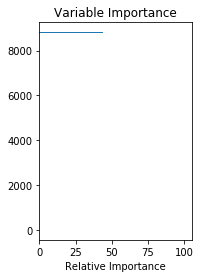

In [49]:
plt.Figure(figsize=(100,30))
feature_importance=rf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(train_x.columns))
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [51]:
columnlist=X_test.iloc[:,sorted_idx[0:50]].columns

In [53]:
#Convert numpy array into dataframe after over sampling

In [54]:
pd.DataFrame(data=X_train,columns=X_test.columns)

,total_words,number_of_sentences,we_count,jealousies_count,absurd_count,torrent_count,clearly_count,truth_count,actuated_count,heart_count,...,recommence_count,utter_count,hume_count,intemperances_count,trembling_count,demagogue_count,intents_count,essays_count,constrained_count,irrevocably_count
0,968.000000,30.000000,24.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3481.726642,108.165361,69.258215,0.847679,1.000000,0.0,0.847679,1.000000,0.000000,0.847679,...,0.0,0.152321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2241.000000,48.000000,33.000000,0.000000,2.000000,0.0,0.000000,2.000000,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2618.139525,82.855994,37.938283,0.041145,0.000000,0.0,1.041145,0.061717,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1526.000000,34.000000,20.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1608.000000,43.000000,17.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2637.076715,81.581375,37.392018,0.405321,0.000000,0.0,1.405321,0.607982,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2979.617801,61.006601,49.719250,0.000000,0.866227,0.0,0.133773,1.000000,0.000000,0.000000,...,0.0,0.866227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3119.000000,103.000000,41.000000,0.000000,0.000000,0.0,2.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3072.000000,100.000000,37.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
